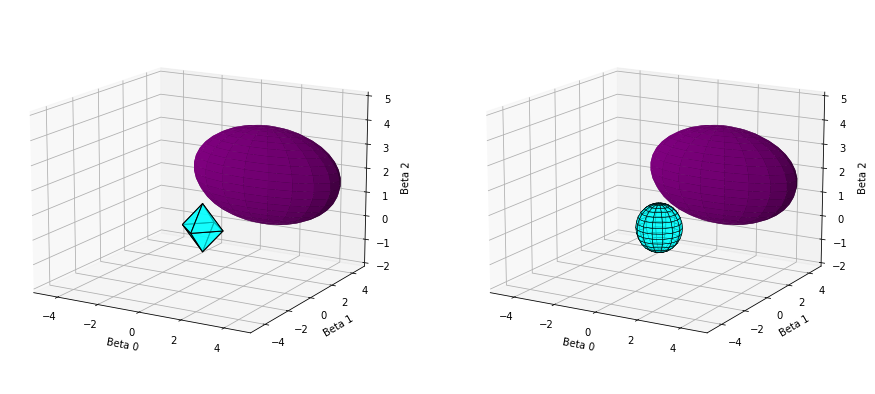

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



#Plotting two wire ellipses centred around (2,2,2)
def create_ellipsoid(segments, a = 3.5, b = 1.5, c = 2, centre = (2,2,2)):
    u = np.linspace(0, 2 * np.pi, segments)
    v = np.linspace(0, np.pi, segments)
    x = a * np.outer(np.cos(u), np.sin(v)) + centre[0]
    y = b * np.outer(np.sin(u), np.sin(v)) + centre[1]
    z = c * np.outer(np.ones(np.size(u)), np.cos(v)) + centre[2]
    return (x, y, z)


fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15, 7), facecolor= 'white', subplot_kw={"projection": "3d"}
)


for i, ax in enumerate([ax1, ax2]):
    ax.set_facecolor(color= 'white')
    ax.view_init(elev=15, azim=-60)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-2, 5)
    ax.set_xlabel("Beta 0")
    ax.set_ylabel("Beta 1")
    ax.set_zlabel("Beta 2")
    (x, y, z) = create_ellipsoid(20)
    ax.plot_surface(x, y, z, color = 'purple', linewidth = 0.7)


#Plotting the unit cube on the first figure
# Vertices of the unit rhombohedron
vertices = [
    (1, 0, 0),
    (-1, 0, 0),
    (0, 1, 0),
    (0, -1, 0),
    (0, 0, 1),
    (0, 0, -1)
]

# Define the faces of the rhombohedron
faces = [
    [vertices[0], vertices[2], vertices[4]],
    [vertices[2], vertices[4], vertices[1]],
    [vertices[4], vertices[1], vertices[3]],
    [vertices[4], vertices[3], vertices[0]],
    [vertices[0], vertices[2], vertices[5]],
    [vertices[2], vertices[5], vertices[1]],
    [vertices[5], vertices[1], vertices[3]],
    [vertices[5], vertices[3], vertices[0]],
    
]


# Plot the unit rhombohedron
ax1.add_collection3d(Poly3DCollection(faces, edgecolor='black', linewidths = 1, facecolors ='cyan', alpha=0.7))


            
#Plotting the unit sphere onto the second
def create_sphere(segmants_phi, segmants_theta):
    phi, theta = np.mgrid[0.0:2.0*np.pi:segmants_phi*1j, 0.0:np.pi:segmants_theta*1j] 
    # Spherical to Cartesian coordinates conversion
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return(x,y,z)

x, y, z = create_sphere(15,15)
faces = []
for i in range(len(x) - 1):
    for j in range(len(x[i]) - 1):
        faces.append([
            [x[i, j], y[i, j], z[i, j]],
            [x[i+1, j], y[i+1, j], z[i+1, j]],
            [x[i+1, j+1], y[i+1, j+1], z[i+1, j+1]],
            [x[i, j+1], y[i, j+1], z[i, j+1]],
        ])

# Plot the unit sphere
sphere = Poly3DCollection(faces, edgecolor='black', linewidths=0.5, facecolors='cyan', alpha=0.7)
ax2.add_collection3d(sphere)

fig.savefig("LassoRidge3D.pdf", bbox_inches="tight")


plt.show()


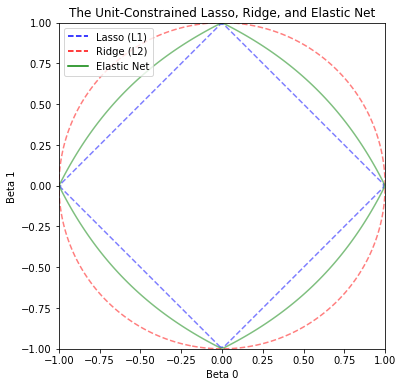

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Function to plot L1, L2, and Elastic Net balls
def plot_balls():
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)

    # L1 Ball (Lasso)
    L1 = np.abs(X) + np.abs(Y)
    plt.contour(X, Y, L1, levels=[1], colors='blue', alpha=0.5, linestyles='dashed')

    # L2 Ball (Ridge)
    L2 = np.sqrt(X**2 + Y**2)
    plt.contour(X, Y, L2, levels=[1], colors='red', alpha=0.5, linestyles='dashed')

    # Elastic Net Ball
    alpha = 0.5  # L1 ratio
    EN = alpha * L1 + (1 - alpha) * L2
    plt.contour(X, Y, EN, levels=[1], colors='green', alpha=0.5)

    plt.xlabel('Beta 0')
    plt.ylabel('Beta 1')
    plt.title('The Unit-Constrained Lasso, Ridge, and Elastic Net')
     
    legend_handles = [Line2D([0], [0], linestyle='dashed', color='blue'),
                      Line2D([0], [0], linestyle='dashed', color='red'),
                      Line2D([0], [0], color='green')] 

    plt.legend(legend_handles, ['Lasso (L1)', 'Ridge (L2)', 'Elastic Net'], loc='upper left')

plt.figure(figsize=(8, 6))

# Plot balls
plot_balls()

# Show plot
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("UnitConstrainedLREN.pdf", bbox_inches="tight")
plt.show()